# 1 Etapa - tratar os dados

In [6]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [7]:
cliente = pd.read_csv('arquivoCSV/clientes.csv')
cliente.isna().sum()
cliente = cliente.dropna()
cliente.shape
cliente.head()

,cod_cliente,sexo,estado_civil,dependentes,educacao,empregado,renda,renda_conjuge,emprestimo,prestacao_mensal,historico_credito,imovel,aprovacao_emprestimo
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267.0,360.0,1.0,Urban,Y


In [8]:
#cliente['sexo'] = cliente['sexo'].map({'Male': 0, 'Female':1})
#cliente

cliente['sexo'] = cliente['sexo'].replace('Male',0)
cliente['sexo'] = cliente['sexo'].replace('Female', 1)

cliente['estado_civil'] = cliente['estado_civil'].replace('No',  0)
cliente['estado_civil'] = cliente['estado_civil'].replace('Yes', 1)

cliente['aprovacao_emprestimo'] = cliente['aprovacao_emprestimo'].replace('N', 0)
cliente['aprovacao_emprestimo'] = cliente['aprovacao_emprestimo'].replace('Y', 1)

cliente


,cod_cliente,sexo,estado_civil,dependentes,educacao,empregado,renda,renda_conjuge,emprestimo,prestacao_mensal,historico_credito,imovel,aprovacao_emprestimo
1,LP001003,0,1,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,0
2,LP001005,0,1,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,1
3,LP001006,0,1,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,1
4,LP001008,0,0,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,1
5,LP001011,0,1,2,Graduate,Yes,5417,4196,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,Graduate,No,2900,0,71.0,360.0,1.0,Rural,1
610,LP002979,0,1,3+,Graduate,No,4106,0,40.0,180.0,1.0,Rural,1
611,LP002983,0,1,1,Graduate,No,8072,240,253.0,360.0,1.0,Urban,1
612,LP002984,0,1,2,Graduate,No,7583,0,187.0,360.0,1.0,Urban,1


# Separando dados em traino e em teste 

In [9]:
x = cliente[['sexo', 'estado_civil', 'renda', 'emprestimo', 'historico_credito', ]]
y = cliente['aprovacao_emprestimo']
print(x.shape)
print(y.shape)

(480, 5)
(480,)


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_teste, y_train, y_teste = train_test_split(x,y, test_size=0.2, ) 

# montando a maquina preditiva 

In [11]:
from sklearn.ensemble import RandomForestClassifier
maquina = RandomForestClassifier(random_state=7)
maquina.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

# Avaliar maquina preditiva

In [12]:
# Importando a metrica de avaliaçao 
from sklearn.metrics import accuracy_score

#### predição com treino 

In [13]:
# Avaliar a acuracia da maquina preditiva baseline com os dados de treino 
predMaquina = maquina.predict(x_train)
accuracy_score(y_train, predMaquina)

0.9765625

#### predição com teste

In [14]:
predMaquina = maquina.predict(x_teste)
accuracy_score(y_teste, predMaquina)

0.78125

## A acertividade da nossa maquina 
### esta muito baixa por isso vamos colocar parametros em nosso 'RandomForestClassifier' assim melhorando a maquina preditiva 

In [15]:
# passando parametros para o RandomForestClassifier
maquina = RandomForestClassifier(max_depth=5, random_state=7, )
maquina.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [16]:
predMaquina = maquina.predict(x_train)
accuracy_score(y_train, predMaquina)

0.8515625

## faça mais testes com outros parametros para melhorar ainda mais o resultados 

In [17]:
predMaquina = maquina.predict(x_teste)
accuracy_score(y_teste, predMaquina)

0.7916666666666666

### Verficando as variaveis mais importante para a minha maquina preditiva 

In [18]:
maquina.feature_importances_

array([0.01654059, 0.04066321, 0.21379999, 0.15807357, 0.57092265])

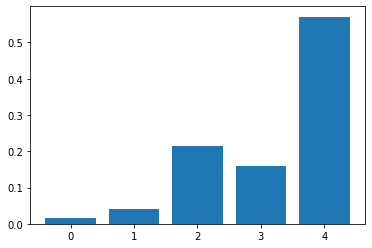

In [19]:
plt.bar(range(len(maquina.feature_importances_)), maquina.feature_importances_)
plt.show()

In [20]:
plt.savefig('maquinaPreditiva.jpg')

<Figure size 432x288 with 0 Axes>

## Podemos salvar nossa Máquina Preditiva para criarmos o Sistema na WEB


In [21]:
#Comando de Salvamento da Máquina Preditiva
import pickle 
pickle_out = open("maquina_preditiva.pkl", mode = "wb")
pickle.dump(maquina, pickle_out) 
pickle_out.close()